In [1]:
# python 
# run_ssd_live_demo.py 
# mb2-ssd-lite 
# /Users/chanho/Documents/GitHub/pytorch-ssd/models/mb2-ssd-lite-mp-0_686.pth 
# /Users/chanho/Documents/GitHub/pytorch-ssd/models/voc-model-labels.txt

In [2]:
from vision.ssd.vgg_ssd import create_vgg_ssd, create_vgg_ssd_predictor
from vision.ssd.mobilenetv1_ssd import create_mobilenetv1_ssd, create_mobilenetv1_ssd_predictor
from vision.ssd.mobilenetv1_ssd_lite import create_mobilenetv1_ssd_lite, create_mobilenetv1_ssd_lite_predictor
from vision.ssd.squeezenet_ssd_lite import create_squeezenet_ssd_lite, create_squeezenet_ssd_lite_predictor
from vision.ssd.mobilenet_v2_ssd_lite import create_mobilenetv2_ssd_lite, create_mobilenetv2_ssd_lite_predictor
from vision.utils.misc import Timer
import cv2
import sys

# if len(sys.argv) < 4:
#     print('Usage: python run_ssd_example.py <net type>  <model path> <label path> [video file]')
#     sys.exit(0)
net_type = 'mb2-ssd-lite'
model_path = r'/Users/chanho/Documents/GitHub/pytorch-ssd/models/mb2-ssd-lite-mp-0_686.pth'
label_path = r'/Users/chanho/Documents/GitHub/pytorch-ssd/models/voc-model-labels.txt'

if len(sys.argv) >= 5:
    cap = cv2.VideoCapture(sys.argv[4])  # capture from file
else:
    cap = cv2.VideoCapture(0)   # capture from camera
    cap.set(3, 1920)
    cap.set(4, 1080)

class_names = [name.strip() for name in open(label_path).readlines()]
num_classes = len(class_names)


if net_type == 'vgg16-ssd':
    net = create_vgg_ssd(len(class_names), is_test=True)
elif net_type == 'mb1-ssd':
    net = create_mobilenetv1_ssd(len(class_names), is_test=True)
elif net_type == 'mb1-ssd-lite':
    net = create_mobilenetv1_ssd_lite(len(class_names), is_test=True)
elif net_type == 'mb2-ssd-lite':
    net = create_mobilenetv2_ssd_lite(len(class_names), is_test=True)
elif net_type == 'sq-ssd-lite':
    net = create_squeezenet_ssd_lite(len(class_names), is_test=True)
else:
    print("The net type is wrong. It should be one of vgg16-ssd, mb1-ssd and mb1-ssd-lite.")
    sys.exit(1)
net.load(model_path)

if net_type == 'vgg16-ssd':
    predictor = create_vgg_ssd_predictor(net, candidate_size=200)
elif net_type == 'mb1-ssd':
    predictor = create_mobilenetv1_ssd_predictor(net, candidate_size=200)
elif net_type == 'mb1-ssd-lite':
    predictor = create_mobilenetv1_ssd_lite_predictor(net, candidate_size=200)
elif net_type == 'mb2-ssd-lite':
    predictor = create_mobilenetv2_ssd_lite_predictor(net, candidate_size=200)
elif net_type == 'sq-ssd-lite':
    predictor = create_squeezenet_ssd_lite_predictor(net, candidate_size=200)
else:
    print("The net type is wrong. It should be one of vgg16-ssd, mb1-ssd and mb1-ssd-lite.")
    sys.exit(1)

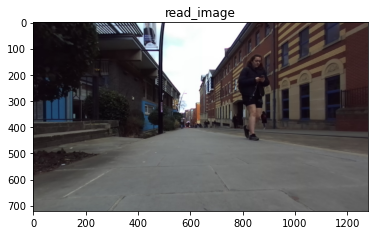

Inference time:  0.16692018508911133
Time: 0.17s, Detect Objects: 1.
tensor([15])
tensor([[786.6763, 117.8807, 908.5825, 456.1840]])
tensor([0.8993])


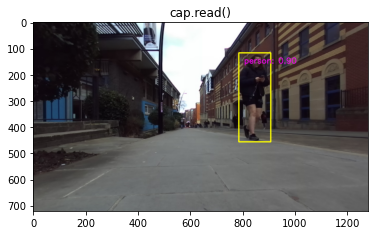

In [3]:
from matplotlib import pyplot as plt

timer = Timer()

def read_image(image_file):
    image = cv2.imread(image_file)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    return image

image = read_image(r'../img/frame1291.png')
plt.imshow(image)
plt.title('read_image')
plt.show()

timer.start()
boxes, labels, probs = predictor.predict(image, 10, 0.4)
interval = timer.end()
print('Time: {:.2f}s, Detect Objects: {:d}.'.format(interval, labels.size(0)))

print(labels)
print(boxes)
print(probs)

for i in range(boxes.size(0)):
    box = boxes[i, :]
    label = f"{class_names[labels[i]]}: {probs[i]:.2f}"
    cv2.rectangle(image, (box[0], box[1]), (box[2], box[3]), (255, 255, 0), 4)

    cv2.putText(image, label,
                (box[0]+20, box[1]+40),
                cv2.FONT_HERSHEY_SIMPLEX,
                1,  # font scale
                (255, 0, 255),
                2)  # line type
plt.imshow(image)
plt.title('cap.read()')
plt.show()

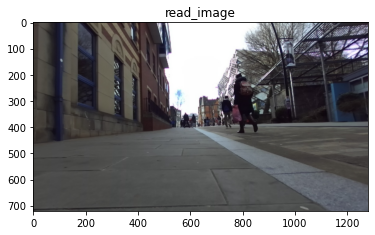

Inference time:  0.1353600025177002
Time: 0.14s, Detect Objects: 0.
tensor([])
tensor([])
tensor([])


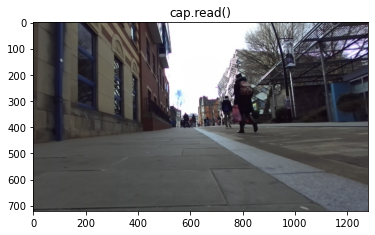

In [4]:
image = read_image(r'../img/frame0700.png')
plt.imshow(image)
plt.title('read_image')
plt.show()

timer.start()
boxes, labels, probs = predictor.predict(image, 10, 0.4)
interval = timer.end()
print('Time: {:.2f}s, Detect Objects: {:d}.'.format(interval, labels.size(0)))

print(labels)
print(boxes)
print(probs)

for i in range(boxes.size(0)):
    box = boxes[i, :]
    label = f"{class_names[labels[i]]}: {probs[i]:.2f}"
    cv2.rectangle(image, (box[0], box[1]), (box[2], box[3]), (255, 255, 0), 4)

    cv2.putText(image, label,
                (box[0]+20, box[1]+40),
                cv2.FONT_HERSHEY_SIMPLEX,
                1,  # font scale
                (255, 0, 255),
                2)  # line type
plt.imshow(image)
plt.title('cap.read()')
plt.show()

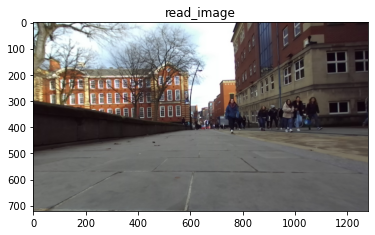

Inference time:  0.13579607009887695
Time: 0.14s, Detect Objects: 1.
tensor([17])
tensor([[ 24.0045,   2.9204, 638.2220, 214.5597]])
tensor([0.4581])


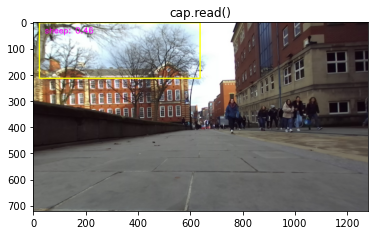

In [5]:
image = read_image(r'../img/frame1900.png')
plt.imshow(image)
plt.title('read_image')
plt.show()

timer.start()
boxes, labels, probs = predictor.predict(image, 10, 0.4)
interval = timer.end()
print('Time: {:.2f}s, Detect Objects: {:d}.'.format(interval, labels.size(0)))

print(labels)
print(boxes)
print(probs)

for i in range(boxes.size(0)):
    box = boxes[i, :]
    label = f"{class_names[labels[i]]}: {probs[i]:.2f}"
    cv2.rectangle(image, (box[0], box[1]), (box[2], box[3]), (255, 255, 0), 4)

    cv2.putText(image, label,
                (box[0]+20, box[1]+40),
                cv2.FONT_HERSHEY_SIMPLEX,
                1,  # font scale
                (255, 0, 255),
                2)  # line type
plt.imshow(image)
plt.title('cap.read()')
plt.show()

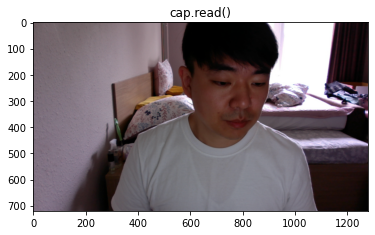

Inference time:  0.12671113014221191
Time: 0.13s, Detect Objects: 1.
tensor([15])
tensor([[ 242.8063,    1.6186, 1109.7930,  716.4288]])
tensor([0.9767])


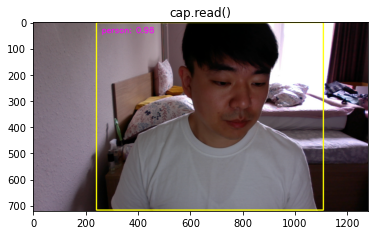

In [6]:
from matplotlib import pyplot as plt

timer = Timer()
ret, orig_image = cap.read()
image = cv2.cvtColor(orig_image, cv2.COLOR_BGR2RGB)
plt.imshow(image)
plt.title('cap.read()')
plt.show()

timer.start()
boxes, labels, probs = predictor.predict(image, 10, 0.4)
interval = timer.end()
print('Time: {:.2f}s, Detect Objects: {:d}.'.format(interval, labels.size(0)))

print(labels)
print(boxes)
print(probs)

for i in range(boxes.size(0)):
    box = boxes[i, :]
    label = f"{class_names[labels[i]]}: {probs[i]:.2f}"
    cv2.rectangle(image, (box[0], box[1]), (box[2], box[3]), (255, 255, 0), 4)

    cv2.putText(image, label,
                (box[0]+20, box[1]+40),
                cv2.FONT_HERSHEY_SIMPLEX,
                1,  # font scale
                (255, 0, 255),
                2)  # line type
plt.imshow(image)
plt.title('cap.read()')
plt.show()